# Мобильная игра «Космические братья». Анализ рекламных источников.

Материалы.<br>
Презентация: <https://disk.yandex.ru/i/rX-L5dIQfFe0FA><br>
Дашборд (ДИАГРАММА РАСПРЕДЕЛЕНИЯ КОЛИЧЕСТВА ПОСТРОЕННЫХ ОБЪЕКТОВ): <https://public.tableau.com/app/profile/vladimir.ogarkov/viz/_16859485994780/Dashboard1>


# Оглавление

* [1. Описание задачи](#описание_задачи)
* [2. Описание данных](#описание_данных)
* [3. Загрузка данных](#загрузка_данных)
* [4. Предобработка данных](#предобработка_данных)
    * [4.1 Изучение общей информации](#изучение_общей_информации)
    * [4.2 Поиск и обработка дубликатов](#поиск_и_обработка_дубликатов)
    * [4.3 Поиск и обработка пропусков](#поиск_и_обработка_пропусков)
    * [4.4 Вывод по предобработке](#вывод_по_предобработке)
* [5. Исследовательский анализ данных](#исследовательский_анализ_данных)
    * [5.1 Количество привлечённых игроков и затраты на их привлечение.](#затраты)
        * [5.1.1 Создание пользовательских профилей](#пользовательские_профили)
        * [5.1.2 Число привлечённых игроков с каждого источника.](#число_привлечённых_пользователей)
        * [5.1.3 Затраты на привлечение пользователей](#затраты_на_привлечение)
    * [5.2 Влияние источника перехода в игру на поведение пользователя](#влияние)
        * [5.2.1 Факт прохождения первого уровня с разбивкой по каналам привлечения.](#факт_прохождения)
        * [5.2.2 Различие количества pvp и pve игроков по каналам привлечения](#различие_количества_pvp_и_pve)
    * [5.3 Строительство объектов игроками.](#строительство)
    * [5.4 Самое популярное событие (экран) среди игроков](#популярное_событие)
    * [5.5 Вывод по исследовательскому анализу данных](#вывод_по_исследовательскому)
* [6. Проверка статистических гипотез.](#проверка_гипотез)
    * [6.1 Различия во времени завершения уровня в зависимости от способа прохождения](#время)
    * [6.2 Различия количества построенных игроком объектов в зависимости от способа завершения уровня.](#постройки)
    * [6.3 Вывод по проверке статистических гипотез](#6_вывод)
* [7. Ранжирование каналов привлечения игроков по эффективности и рекомендации заказчику](#ранжирование)

<a id = 'описание_задачи'></a>
# 1. Описание задачи.
**Заказчик:**
- Маркетинговый отдел.

**Требуется изучить:**
- Каналы привлечения новых пользователей и выявить среди них лидеров.<br>
Изучить нужно стоимость привлечения пользователей, их объём и вид игроков.

**Задача:**<br>

Проанализировать поведение игроков в зависимости от источника перехода.

- Провести исследовательский анализ данных;
- Проанализировать влияние источника перехода в игру на поведение пользователя;

**Цель:**
- Оптимизация расходов на привлечение игроков (ранжирование каналов по эффективности).

<a id = 'описание_данных'></a>
# 2. Описание данных
Имеются данные о первом уровне игры, которые собраны из логов игры (постройки, проект и завершение уровня) в течение одного месяца, а так же данные о маркетинговой компании - пользователи привлекались из четырёх каналов в течение семи дней (суммарный расход на привлечение игроков в у.е.).<br>
В данных не содержится информация об органических пользователях.<br><br>

**Описание датасетов:**

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья».

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет ***game_actions.csv***:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Помимо основного датасета есть два датасета с информацией о рекламных активностях.

Датасет ***ad_costs.csv***:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет ***user_source.csv*** содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

In [1]:
# Ячейка с импортом нужных библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st
import numpy as np

<a id ='загрузка_данных'></a>
# 3. Загрузка данных

In [2]:
# Загружаем датасеты в переменные
game_actions = pd.read_csv('/datasets/game_actions.csv')
ad_costs = pd.read_csv('/datasets/ad_costs.csv')
user_source = pd.read_csv('/datasets/user_source.csv')

In [3]:
# Создадим функцию, отображающую информацию о датафрейме, кол-во дубликатов и пропусков
def data_review(data):
    display(data.info())
    print('---------------------------------------------')
    print('Дубликаты:', data.duplicated().sum())
    print('---------------------------------------------')
    print('Пропуски:')
    display(data.isna().sum().sort_values(ascending=False))

<a id = 'предобработка_данных'></a>
# 4. Предобработка данных

<a id = 'изучение_общей_информации'></a>
## 4.1 Изучение общей информации

In [4]:
game_actions.sample(5)

,event_datetime,event,building_type,user_id,project_type
115599,2020-05-16 02:57:21,building,spaceport,36e789cf-3f0c-463e-b9e8-777a4e98fdc7,NaN
36248,2020-05-07 20:16:10,building,assembly_shop,44c62290-28f1-42ac-ae30-a0743cd04b32,NaN
20615,2020-05-06 08:26:03,building,assembly_shop,a0b3bddb-931b-4b08-b19f-98eb275089e7,NaN
112091,2020-05-15 12:02:50,building,spaceport,daa907df-c741-4c92-9871-7cf2710a0bfb,NaN
119524,2020-05-16 21:16:47,building,spaceport,4b007df6-a984-4a0e-8489-3c760a0f01b3,NaN


In [5]:
ad_costs

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [6]:
user_source.sample(5)

,user_id,source
10537,c6bc7109-3730-489e-812a-be69f980ea15,youtube_channel_reklama
12780,f0b7bf6f-e746-4e06-babb-6123c029f890,yandex_direct
11709,dd0df6d8-2093-4b74-8eb1-66bcc0ba3052,youtube_channel_reklama
10594,c7aa9dc6-52af-4581-9461-225977989022,yandex_direct
4531,53d8dfd2-d601-461b-a4fd-890be5b45d27,yandex_direct


In [7]:
data_review(game_actions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


None

---------------------------------------------
Дубликаты: 1
---------------------------------------------
Пропуски:


project_type      133774
building_type       7683
event_datetime         0
event                  0
user_id                0
dtype: int64

In [8]:
data_review(ad_costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


None

---------------------------------------------
Дубликаты: 0
---------------------------------------------
Пропуски:


source    0
day       0
cost      0
dtype: int64

In [9]:
data_review(user_source)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


None

---------------------------------------------
Дубликаты: 0
---------------------------------------------
Пропуски:


user_id    0
source     0
dtype: int64

***Тип данных столбцов*** `event_datetime` и `day` в датасетах `game_actions` и `ad_costs` **не соответствуют.**<br>
***Приведём их к*** `datetime`.

In [10]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'], format = '%Y-%m-%d %H:%M:%S')
ad_costs['day'] = pd.to_datetime(ad_costs['day'], format = '%Y-%m-%d')

<a id = 'поиск_и_обработка_дубликатов'></a>
## 4.2 Дубликаты

In [11]:
game_actions[game_actions[['event_datetime', 'user_id']].duplicated()]

,event_datetime,event,building_type,user_id,project_type
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


In [12]:
# Взглянем на все записи - дубликаты
game_actions.query('user_id == "c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af" and event_datetime == "2020-05-10 18:41:56"')

,event_datetime,event,building_type,user_id,project_type
74890,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


***Строки абсолютно идеентичны и идут друг за другом, будем считать, что это ошибка при сборе логов и удалим дубликат.***

In [13]:
game_actions = game_actions.drop_duplicates(keep='first').reset_index(drop=True)

<a id = 'поиск_и_обработка_пропусков'></a>
## 4.3 Пропуски
Пропуски имеются в столбцах project_type и building_type.
Проверим по каждомму типу события.

***Тип события*** `project`:

In [14]:
game_actions.query('event == "project"')['project_type'].unique()

array(['satellite_orbital_assembly'], dtype=object)

In [15]:
game_actions.query('event == "project"')['building_type'].unique()

array([nan], dtype=object)

- ***Выходит, что в первом уровне игрокам доступен только один проект*** - `satellite_orbital_assembly`
- ***При событии `project` тип постройки не заполняется (`NaN`).***
- ***Механика игры не нарушена, пропуски не являются ошибкой.***

***Тип события*** `building`:

In [16]:
game_actions.query('event == "building"')['building_type'].unique()

array(['assembly_shop', 'spaceport', 'research_center'], dtype=object)

In [17]:
game_actions.query('event == "building"')['project_type'].unique()

array([nan], dtype=object)

- ***Игрокам в первом уровне доступны три типа построек:***
    - `assembly_shop`;
    - `spaceport`;
    - `research_center`.

- ***При событии*** `building` ***тип проекта не заполняется*** (`NaN`).
- ***Механика игры не нарушена, пропуски не являются ошибкой.***

***Тип события*** `building`:

***Тип события*** `finished_stage_1`:

In [18]:
game_actions.query('event == "finished_stage_1"')['project_type'].unique()

array([nan], dtype=object)

In [19]:
game_actions.query('event == "finished_stage_1"')['building_type'].unique()

array([nan], dtype=object)

- ***При событии*** `finished_stage_1` ***тип постройки и тип проекта не заполняются*** (`NaN`).<br>
- ***Механика игры не нарушена, пропуски не являются ошибкой.***

***Проверим себя дополнительно.***<br>
***Согласно механике игры - количество пропусков в столбце*** `project_type` ***должно равняться сумме всех записей при событиях*** `finished_stage_1` и `building`.

In [20]:
game_actions.query('event == "finished_stage_1" or event == "building"')['event'].count()

133773

***И количество пропусков в столбце*** `building_type` ***должно равняться сумме всех записей при событиях*** `finished_stage_1` и `project`.

In [21]:
game_actions.query('event == "finished_stage_1" or event == "project"')['event'].count()

7683

In [22]:
game_actions[['project_type', 'building_type']].isna().sum()

project_type     133773
building_type      7683
dtype: int64

<a id = 'вывод_по_предобработке'></a>
## 4.4 Вывод по предобработке данных

- В нашем распоряжении три датафрейма, в которых содержится информация о привлечении пользователей из четырёх источников в игру в течение недели и дальнейшее логирование их действий в течение периода с 04.05.2020 по 05.06.2020;
- Изменение типа данных понадобилось в двух столбцах с датами датафреймов game_actions и ad_costs;
- В датафрейме game_actions была обнаружена строка - дубликат, которая была удалена. Будем считать её ошибкой при логировании.
- Были проверены пропуски в столбцах project_type и building_type датафрейма game_actions. Пропуски не являются ошибкой, - это результат механики игры, т.е. при событии project - столбец building_type не заполняется (заполняется Nan-значениями), соответственно при событии building NaN-значениями заполняется столбец project_type.

<a id = 'исследовательский_анализ_данных'></a>
# 5. Исследовательский анализ данных.

<a id='затраты'></a>
## 5.1 Количество привлечённых игроков и затраты на их привлечение.

<a id='пользовательские_профили'></a>
### 5.1.1 Создание пользовательских профилей

In [23]:
# Добавим к событиям источник, с которого пришёл игрок
sessions = game_actions.merge(user_source, on='user_id', how='left')
sessions.sample(5)

,event_datetime,event,building_type,user_id,project_type,source
27428,2020-05-07 00:40:59,building,assembly_shop,ecfbcfbc-08f7-4ab8-8514-e973bd53561c,NaN,instagram_new_adverts
84976,2020-05-11 19:20:11,building,spaceport,66c79c7f-8d76-4e13-b895-dd8b1a93f797,NaN,facebook_ads
122787,2020-05-17 15:58:12,building,spaceport,8bc084a7-1ffa-40ff-a594-d97cf3dfbd70,NaN,yandex_direct
18200,2020-05-06 02:21:29,building,assembly_shop,f4d74e9a-d816-4f03-96d1-1deef0154f73,NaN,yandex_direct
13819,2020-05-05 15:13:49,building,assembly_shop,57919ee7-1a76-45b0-89b2-55339aa27701,NaN,yandex_direct


In [24]:
# Создадим пользовательские профили с источником перехода и датами первой и последней сессии
profiles = (
    sessions
    .sort_values(by=['user_id', 'event_datetime'])
    .groupby('user_id')
    .agg({'event_datetime':['first', 'last'], 'source':'first'})
    .reset_index())

profiles['first_date'] = profiles['event_datetime']['first'].dt.date    #дата первого посещения (без времени)
profiles['last_date'] = profiles['event_datetime']['last'].dt.date      #дата последнего посещения
profiles['first_date'] = pd.to_datetime(profiles['first_date'], format='%Y-%m-%d')
profiles['last_date'] = pd.to_datetime(profiles['last_date'], format='%Y-%m-%d')
profiles.columns = profiles.columns.droplevel(1)

# убираем лишнее
profiles = profiles[['user_id', 'source', 'first_date', 'last_date']]
profiles.head()

,user_id,source,first_date,last_date
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06,2020-05-20
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct,2020-05-06,2020-05-18
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama,2020-05-05,2020-05-14
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts,2020-05-05,2020-05-12
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads,2020-05-05,2020-05-22


<a id='число_привлечённых_пользователей'></a>
### 5.1.2 Число привлечённых игроков с каждого источника.

In [25]:
# Привлечено игроков каждым источником
source_usr_cnt = (
    profiles
    .groupby('source', as_index=False)
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id':'usr_cnt'})
    .sort_values('usr_cnt', ascending=False)
    .reset_index(drop=True)
)
source_usr_cnt

,source,usr_cnt
0,yandex_direct,4817
1,instagram_new_adverts,3347
2,facebook_ads,2726
3,youtube_channel_reklama,2686


In [26]:
# Визуализируем число привлечённых игроков каждым источником
fig=px.bar(source_usr_cnt.sort_values('usr_cnt'),
           x='usr_cnt', y='source', text='usr_cnt')
fig.update_layout(title='Число привлечённых игроков с каждого источника',
                 xaxis_title='Пользователей привлечено',
                 yaxis_title='Канал привлечения',
                 width=900,
                 height=300)
fig.update_xaxes(range=[2000, 4900])
fig.show();

- ***Больше всего пользователей пришли из источника*** `yandex_direct`.
- `youtube_channel_reklama` ***привёл в игру меньше всего пользователей.***

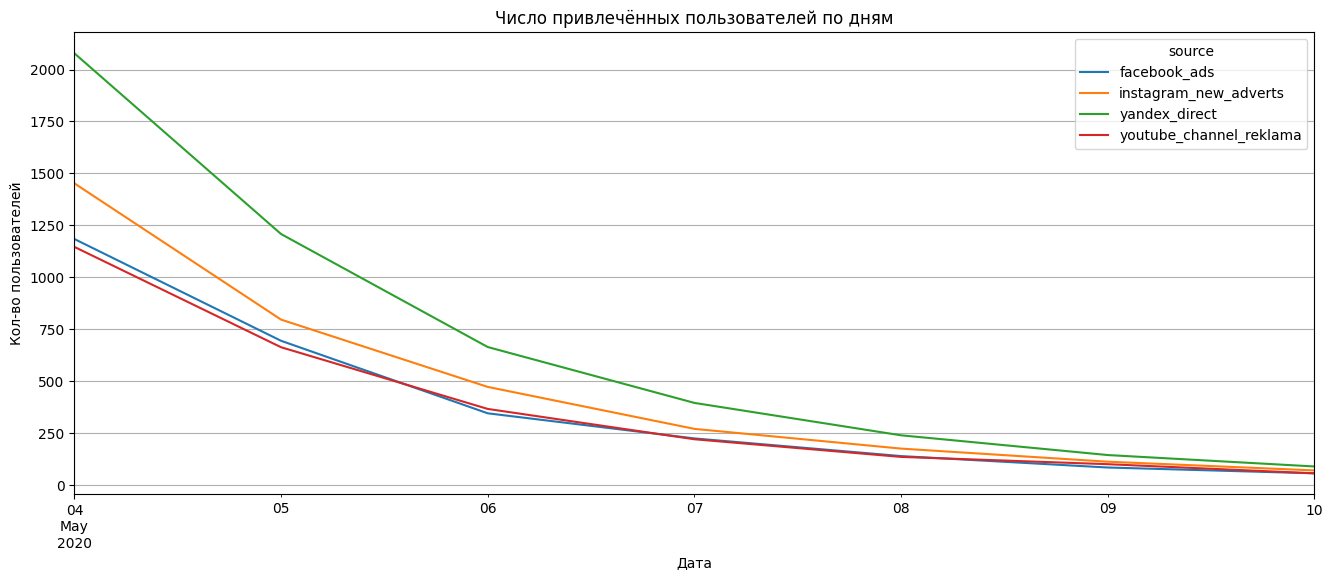

In [27]:
# Визуализируем число привлечённых пользователей с каждого источника по дням
(
    profiles
    .pivot_table(index='first_date', columns='source', values='user_id', aggfunc='nunique')
    .plot(figsize=(16,6), grid=True, ylabel='Кол-во пользователей', xlabel='Дата',
          title='Число привлечённых пользователей по дням')
);

- ***Максимальный приток новых пользователей из источников привлечения наблюдается в начале обозреваемого периода.***
- ***Далее график идёт на спад в течение всего временного промежутка.***
- ***Канал*** `yandex_direct` ***лидирует на протяжении всего отрезка времени, который доступен нам для исследования.***

<a id='затраты_на_привлечение'></a>
### 5.1.3 Затраты на привлечение пользователей

In [28]:
# Общие затраты на привлечение пользователей по источникам
source_total_cost = (
    ad_costs
    .groupby('source', as_index=False)
    .agg({'cost':'sum'})
    .rename(columns={'cost':'total_cost'})
    .sort_values('total_cost', ascending=False)
    .reset_index(drop=True)
)
source_total_cost['total_cost'] = source_total_cost['total_cost'].round()
print('За одну неделю потрачено', source_total_cost['total_cost'].sum(), 'у.е.')
source_total_cost

За одну неделю потрачено 7603.0 у.е.


,source,total_cost
0,yandex_direct,2233.0
1,instagram_new_adverts,2161.0
2,facebook_ads,2141.0
3,youtube_channel_reklama,1068.0


In [29]:
# Визуализируем затраты по источникам
fig=px.bar(source_total_cost.sort_values('total_cost'),
           x='total_cost', y='source', text='total_cost')
fig.update_layout(title='Затраты на привлечение пользователей по каналам за неделю',
                 xaxis_title='Потрачено, у.е.',
                 yaxis_title='Источник привлечения',
                 width=900,
                 height=300)
fig.update_xaxes(range=[500, 2250])
fig.show();

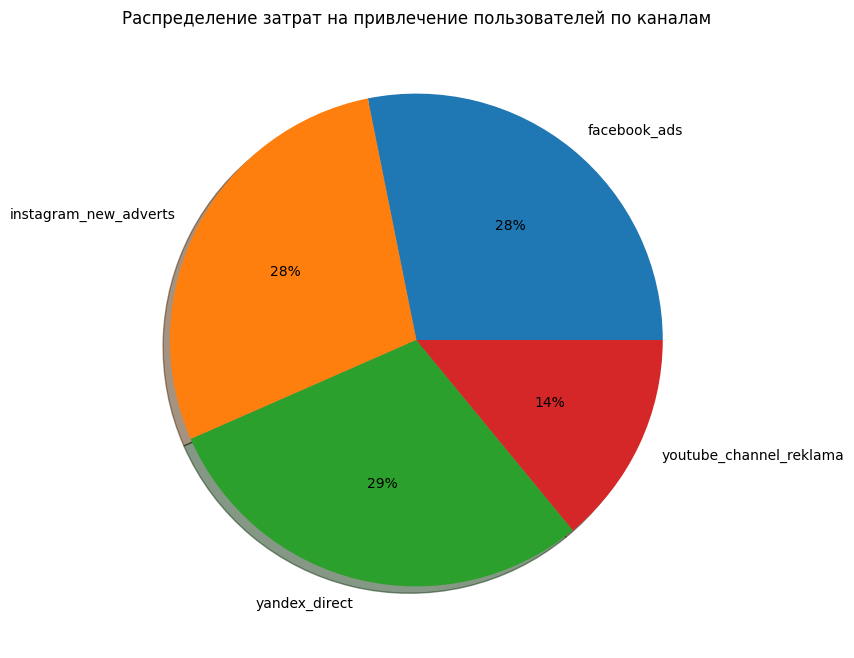

In [30]:
# Доли затрат по каналам
(
    ad_costs
    .groupby('source')['cost'].sum()
    .plot(kind='pie', y='cost', autopct='%1.0f%%',
          figsize=(15,8),
          title='Распределение затрат на привлечение пользователей по каналам',
          ylabel='',
          shadow=True));

- ***Тройка лидеров по затратам*** (`yandex`, `instagram` и `facebook`) ***имеют не особо большую разницу во вложенных средствах. За неделю на каждый из этих трёх источников было потрачено*** `2 141` - `2 233 у.е.`
- ***В рекламу на*** `youtube` за 7 дней было вложено `1 068 у.е.`, ***что в два раза меньше, чем любой другой источник.***

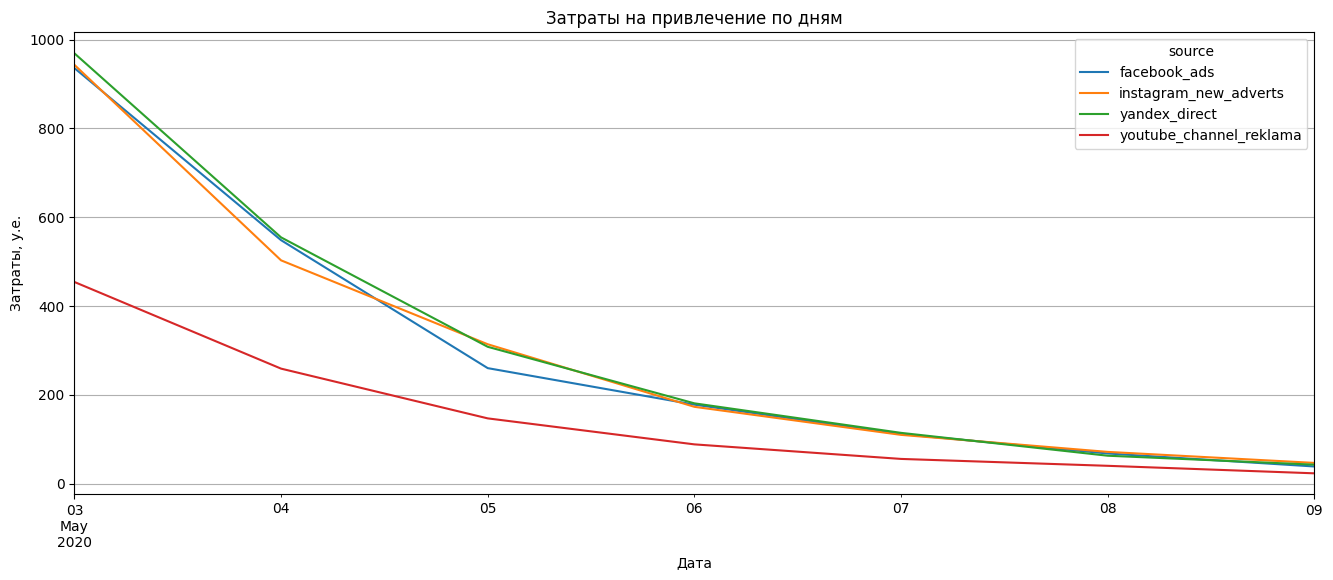

In [31]:
# Визуализируем затраты на привлечение пользователей по дням
(
    ad_costs
    .pivot_table(index='day', columns='source', values='cost')
    .plot(figsize=(16,6), grid=True, ylabel='Затраты, у.е.', xlabel='Дата', title='Затраты на привлечение по дням')
);

- ***Максимальные затраты были в начале исследуемого периода (03.05.2020).***
- ***Далее вложения становятся меньше с каждым днём, стремясь к нулю около 09.05.2020***

**Вложения в рекламу, судя по всему, происходили авансом, т.к. из предыдущих графиков и таблиц мы видим, что данные о притоке пользователей начинаются с 04.05.2020 - на день позже от даты начала вложений в рекламу.**

In [32]:
# Стоимость привлечения одного пользователя (САС)
source_cost_user = source_total_cost.merge(source_usr_cnt, on='source', how='left')
source_cost_user['CAC'] = round(source_cost_user['total_cost'] / source_cost_user['usr_cnt'], 2)
source_cost_user.sort_values('CAC', ascending=False).reset_index(drop=True)

,source,total_cost,usr_cnt,CAC
0,facebook_ads,2141.0,2726,0.79
1,instagram_new_adverts,2161.0,3347,0.65
2,yandex_direct,2233.0,4817,0.46
3,youtube_channel_reklama,1068.0,2686,0.40


In [33]:
# Визуализируем "стоимость игрока"
fig=px.bar(source_cost_user.sort_values('CAC'),
           x='CAC', y='source', text='CAC')
fig.update_layout(title='Стоимость привлечения игрока в у.е.',
                 xaxis_title='Стоимость в у.е.',
                 yaxis_title='Источник привлечения пользователей',
                 width=900,
                 height=300)
fig.update_xaxes(range=[0.3, 0.8])
fig.show();

- ***Дороже всего обходятся пользователи, пришедшие с*** `facebook_ads`, ***дешевле всего - с*** `youtube_channel_reklama`.
- ***Лидером по соотношению количество/стоимость привлечения пользователя является*** `yandex_direct`.
- ***Так, при стоимости привлечения пользователя в*** `0.46 у.е.` ***за одну неделю каналом*** `yandex_direct` ***в игру было привлечено*** `4 817` ***пользователей;***
- ***Канал*** `facebook_ads` ***при стоимости привлечения*** `0.79 у.е.` ***привёл в игру за неделю*** `2 726` ***пользователей.***
- ***дешевле только у*** `youtube_channel_reklama`, ***с этого источника пришло почти в два раза меньше чем с*** `yandex_direct` ***игроков, но и затраты на этот канал привлечения были почти в два раза меньше, чем в остальные.***

<a id='влияние'></a>
## 5.2 Влияние источника перехода в игру на поведение пользователя.

<a id='факт_прохождения'></a>
### 5.2.1 Факт прохождения первого уровня (finished_stage_1) с разбивкой по каналам привлечения.

In [34]:
# число игроков завершивших первый уровень по каналам привлечения
finished_users_by_source = (
    sessions
    .query('event == "finished_stage_1"')
    .groupby('source', as_index=False)
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id':'finished_usr'})
    .sort_values('finished_usr', ascending=False)
    .reset_index(drop=True)
)
finished_users_by_source

,source,finished_usr
0,yandex_direct,2042
1,instagram_new_adverts,1466
2,youtube_channel_reklama,1159
3,facebook_ads,1150


In [35]:
# Визуализируем факт прохождения уровня
fig=px.bar(finished_users_by_source.sort_values('finished_usr'),
           x='finished_usr', y='source', text='finished_usr')
fig.update_layout(title='Игроки прошедшие первый уровень',
                 xaxis_title='Игроков прошло первый уровень',
                 yaxis_title='Источник',
                 width=900,
                 height=300)
fig.update_xaxes(range=[1000, 2050])
fig.show();

- ***Игроков, пришедших с канала*** `yandex_direct` ***больше всего (2 042) среди тех, кто завершил первый уровень.***
- ***Меньше всего до "финиша" добралось игроков, пришедших с канала*** `facebook_ads` - `1 150`.

**Однако стоит взглянуть на соотношение игроков, завершивших первый уровень, к числу изначально привлечённых по каждому источнику. Эта цифра нагляднее покажет процент игроков, которые остались в игре и не "отвалились".**

In [36]:
ratio_finished = source_cost_user.merge(finished_users_by_source, on='source', how='left')
ratio_finished['ratio_finished, %'] = round(ratio_finished['finished_usr'] / ratio_finished['usr_cnt'] * 100, 2)
(
    ratio_finished[['source', 'usr_cnt', 'finished_usr', 'ratio_finished, %']]
    .sort_values('ratio_finished, %', ascending=False)
    .reset_index(drop=True)
)

,source,usr_cnt,finished_usr,"ratio_finished, %"
0,instagram_new_adverts,3347,1466,43.80
1,youtube_channel_reklama,2686,1159,43.15
2,yandex_direct,4817,2042,42.39
3,facebook_ads,2726,1150,42.19


In [37]:
# Визуализируем процент игроков, дошедших до конца уровня
fig=px.bar(ratio_finished.sort_values('ratio_finished, %'),
           x='ratio_finished, %', y='source', text='ratio_finished, %')
fig.update_layout(title='Процент игроков, которые прошли первый уровень',
                 xaxis_title='Процент игроков прошедших первый уровень',
                 yaxis_title='Источник',
                 width=900,
                 height=300)
fig.update_xaxes(range=[38, 44])
fig.show();

***Число игроков, которые прошли первый уровень и не "отвалились" по всем каналам - примерно одинаковое - `42.2`-`43.8%`.***

Для наглядности визуализируем игроков по каждому каналу, разделив их по признаку был ли завершён уровень.

In [38]:
# список игроков, завершивших первый уровень
finished_users = game_actions.query('event == "finished_stage_1"')['user_id'].tolist()

In [39]:
# функция для создания доп столбца с признаком завершения/незавершения уровня
def finish(row):
    if row['user_id'] in finished_users:
        val = 'завершён'
    else:
        val = 'не завершён'
    return val

In [40]:
# Добавление столбца с признаком завершения/незавершения уровня
user_source['is_finished'] = user_source.apply(finish, axis=1)


In [41]:
user_source.groupby(['source', 'is_finished'], as_index=False).agg({'user_id':'count'})

,source,is_finished,user_id
0,facebook_ads,завершён,1150
1,facebook_ads,не завершён,1576
2,instagram_new_adverts,завершён,1466
3,instagram_new_adverts,не завершён,1881
4,yandex_direct,завершён,2042
5,yandex_direct,не завершён,2775
6,youtube_channel_reklama,завершён,1159
7,youtube_channel_reklama,не завершён,1527


In [42]:
# Визуализируем игроков по признаку завершения уровня
fig = px.bar(user_source.groupby(['source', 'is_finished'], as_index=False)
             .agg({'user_id':'count'}).sort_values('user_id'),
             x='user_id',
             y='source',
             color='is_finished',
             text='user_id')
fig.update_layout(title='Число привлечённых игроков, разделённых по признаку завершения уровня',
                  xaxis_title='Количество игроков',
                  yaxis_title='Канал привлечения',
                  legend_title=' ',
                  width=900, height=300)
fig.show()

***Наблюдается очень интересная закономерность:***
- ***Процент игроков, которые прошли первый уровень и не "отвалились" по всем каналам - примерно одинаковый -*** `42.2`-`43.8%`.

**Смею предположить, что здесь имеет место разница в категориях людей, которые в большинстве используют тот или иной ресурс (канал привлечения). Т.е. игроки, которые пришли с** `instagram`, **с бoльшей вероятностью дойдут до конца уровня, чем те, кто пришёл с** `facebook'a`.
- ***Так, мы видим, что "отстающий" по затратам и количеству пришедших игроков*** `youtube` ***занимает второе место (с разницей всего в*** `0.6%` ***от "лидера") среди дошедших до конца первого уровня пользователей.***

**На это стоит обратить внимание при планировании следующих рекламных кампаний, но не стоит забывать, что это процент ОТ числа привлечённых игроков. Однако также важно помнить, что в стоимости мы обнаружили различия почти в два раза, а тут 0.6%**

<a id='различие_количества_pvp_и_pve'></a>
### 5.2.2 Различие количества PVP и PVE игроков по каналам привлечения

***Будем считать, что `PVP` игрок - это тот, кто завершил уровень не выполняя проект, а `PVE` игрок - это тот, у которого перед завершением уровня есть действие `project`. Делить игроков по типу прохождения будем только тех, кто завершил уровень (имеет действие finished_stage_1).***

In [43]:
# Создадим списки с id игроков, в зависимости от способа прохождения уровня
# Для этого разделим юзеров на тех, кто завершил уровень выполнив проект и на тех, кто победил первого врага
pve_users = game_actions.query('event == "project" and user_id in @finished_users')['user_id'].tolist()
pvp_users = game_actions.query('event != "project" and user_id in @finished_users')['user_id'].tolist()

In [44]:
# Функция для создания доп столбца с признаком завершения/незавершения уровня
def pvp_or_pve(row):
    if row['user_id'] in pve_users:
        val = 'pve'
    elif row['user_id'] in pvp_users:
        val = 'pvp'
    else:
        val = 'не завершён'
    return val
# Добавление столбца к профайлам с признаком незавершения/завершения уровня и метода
profiles['pvp_or_pve'] = profiles.apply(pvp_or_pve, axis=1)
profiles.sample(5)

,user_id,source,first_date,last_date,pvp_or_pve
11589,dae4ab35-d434-4c75-8b3a-7dae0ed0c224,yandex_direct,2020-05-07,2020-05-20,не завершён
7729,909122b6-fbc0-4b47-8189-867ee8699402,instagram_new_adverts,2020-05-04,2020-05-09,не завершён
6634,7b3f23bd-cc3f-416e-abb3-2d0788d2d7ac,facebook_ads,2020-05-04,2020-05-13,pvp
5109,5f0d6c8d-1afe-4acd-9c76-13483e73b671,yandex_direct,2020-05-07,2020-05-14,pvp
11159,d37c1f76-7743-4a0e-935f-2787e7e7a53d,youtube_channel_reklama,2020-05-04,2020-05-14,не завершён


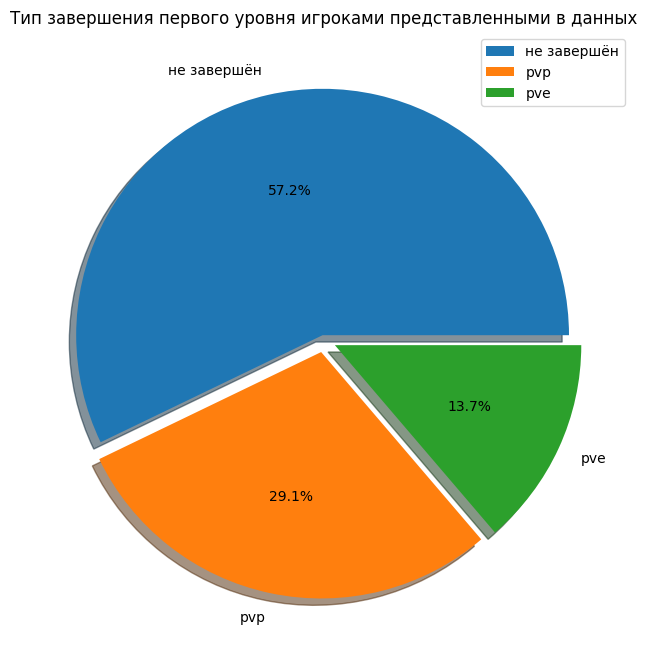

In [45]:
# Взглянем на всех игроков под углом завершения первого уровня и типом его завершения
(
    profiles['pvp_or_pve']
    .value_counts()
    .to_frame()
    .plot(kind='pie',
          y='pvp_or_pve',
          autopct='%1.1f%%',
          figsize=(15,8),
          title='Тип завершения первого уровня игроками представленными в данных',
          ylabel='',
         shadow=True,
         explode=(0.02, 0.05, 0.05)));

- ***Не завершили первый уровень*** `57.2%` ***игроков!***
- ***Прошли первый уровень*** `43%` ***игроков, из которых:***
    - `29.1%` ***- закончили уровень путём победы над первым врагом;***
    - `13.7%` ***- закончили уровень путём выполнения проекта.***

In [46]:
# Создадим датафрейм с данными о PVE и PVP игроках пришедших с каждого источника
source_pvp_or_pve = (
    profiles.query('pvp_or_pve == "pve" or pvp_or_pve == "pvp"')
    .groupby(['source', 'pvp_or_pve'], as_index=False)
    .agg({'user_id':'nunique'})
    .rename(columns={'user_id':'usr_cnt'}))

# Добавим столбец с общим числом игроков, завершивших уровень
source_pvp_or_pve = (
    source_pvp_or_pve
    .merge(source_pvp_or_pve.groupby('source', as_index=False).agg({'usr_cnt':'sum'})
           , on='source', how='left')
    .rename(columns={'usr_cnt_x':'usr_cnt', 'usr_cnt_y':'finished_usr'}))

# И столбец отображающий долю в процентах от общего числа игроков, завершивших уровень
source_pvp_or_pve['ratio, %'] = round(source_pvp_or_pve['usr_cnt'] / source_pvp_or_pve['finished_usr'] * 100, 2)
source_pvp_or_pve[['source', 'pvp_or_pve', 'usr_cnt', 'ratio, %']]

,source,pvp_or_pve,usr_cnt,"ratio, %"
0,facebook_ads,pve,391,34.00
1,facebook_ads,pvp,759,66.00
2,instagram_new_adverts,pve,476,32.47
3,instagram_new_adverts,pvp,990,67.53
4,yandex_direct,pve,620,30.36
5,yandex_direct,pvp,1422,69.64
6,youtube_channel_reklama,pve,379,32.70
7,youtube_channel_reklama,pvp,780,67.30


***Распределение долей `PVP` и `PVE` игроков, в зависимости от источника, с которого они попали в игру - примерно одинаковое на всех каналах.***
- ***PVP игроки -*** `66-69%`
- ***PVE игроки -*** `30-34%`

In [47]:
# Визуализируем игроков pvp и pve разделив их по каналам привлечения
fig = px.bar(source_pvp_or_pve.sort_values('finished_usr'),
             x='usr_cnt',
             y='source',
             color='pvp_or_pve',
             text='usr_cnt')
fig.update_layout(title='Количество игроков, прошедших первый уровень в зависимости от типа прохождения уровня',
                  xaxis_title='Количество игроков, прошедших уровень',
                  yaxis_title='Канал привлечения',
                  legend_title=' ',
                  width=900, height=300)
fig.show()

- *Из `13 576` привлечённых за счёт рекламы пользователей - только `5 817` игроков закончили первый уровень, что составляет `43.8%`;*
- *Из прошедших первый уровень привлечённых пользователей - большую часть составляют `PVP` игроки - `29.1%` от общего количества игроков, которые пришли благодаря вложениям в рекламу;*
- *Доля `PVE` игроков, т.е. тех, которые закончили уровень путём выполнения проекта составляет `13.7%` от общего количество привлечённых игроков;*
- *Соотношение количества `PVP` и `PVE` игроков* **по каналам привлечения** *примерно одинаково - `66-69% PVP` игроков и `30-34% PVE` игроков.*

<a id='строительство'></a>
## 5.3 Строительство объектов игроками.

***Допустим, что с точки зрения монетизации, нам интереснее те игроки, которые совершают больше построек и завершают уровень любым способом.***

***Рассмотрим, сколько объектов строят игроки, пришедшие с разных каналов***

In [48]:
# Сколько объектов построил каждый игрок
users_buildings = (
    sessions.query('user_id in @finished_users and event == "building"')
    .groupby(['source', 'user_id'], as_index=False)
    .agg({'event':'count'})
    .rename(columns={'event':'buildings'}))
users_buildings.sample(5)

,source,user_id,buildings
97,facebook_ads,1822857a-d15f-4f10-98a4-2d916e111ea2,12
5591,youtube_channel_reklama,cfee0af2-b356-44fe-822e-aa9c38066f24,15
3641,yandex_direct,7d45f5c8-e079-43c4-9bcf-0400e8c97068,15
1180,instagram_new_adverts,046848dc-8c7c-4f7d-a89c-86f557493390,9
1757,instagram_new_adverts,6956965f-d464-4978-8dd8-d8bcd4f8abca,10


In [49]:
# Суммарное число построек, среднее на пользователя и медиана на пользователя по каналам
source_buildings = (
    users_buildings
    .groupby('source', as_index=False)['buildings'].agg(['sum', 'mean', 'median'])
    .rename(columns={'sum':'buildings', 'mean':'avg_buildings', 'median':'median_buildings'})
    .sort_values('buildings', ascending=False)
    .reset_index())
source_buildings['avg_buildings'] = round(source_buildings['avg_buildings'], 2)
source_buildings

,source,buildings,avg_buildings,median_buildings
0,yandex_direct,21141,10.35,11.0
1,instagram_new_adverts,15378,10.49,11.0
2,youtube_channel_reklama,12164,10.50,11.0
3,facebook_ads,12103,10.52,11.0


In [50]:
# Визуализируем суммарное количество построек
fig=px.bar(source_buildings.sort_values('buildings'),
           x='buildings', y='source', text='buildings')
fig.update_layout(title='Суммарное число построек по каналам привлечения',
                 xaxis_title='Число построек',
                 yaxis_title='Источник',
                 width=900,
                 height=300)
fig.update_xaxes(range=[10000, 21200])
fig.show();

- ***Среднее количество построек на пользователя и медиана числа построек на пользователя - одинаковы у всех каналов привлечения;***
- ***По суммарному количеству построек лидирует `yandex`, за ним `instagram` и `youtube`.***

<a id='популярное_событие'></a>
## 5.4 Самое популярное событие (экран) среди игроков.

In [51]:
# Добавим столбец с типом события
game_actions['type_of_event'] = (
    game_actions['building_type']
    .fillna(game_actions['project_type'])
    .fillna(game_actions['event']))
# Посчитаем все типы событий, совершаемые игроками
event_count = (
    game_actions[['user_id', 'event_datetime', 'type_of_event']]
    .groupby('type_of_event', as_index=False)['user_id'].count()
    .rename(columns={'user_id':'count'})
    .sort_values('count', ascending=False)
    .reset_index(drop=True))
event_count

,type_of_event,count
0,spaceport,59325
1,assembly_shop,54494
2,research_center,14137
3,finished_stage_1,5817
4,satellite_orbital_assembly,1866


In [52]:
# Визуализируем события по популярности (частоте приминения игроками)
fig=px.bar(event_count.sort_values('count'),
           x='count', y='type_of_event', text='count')
fig.update_layout(title='События в игре за 33 дня',
                 xaxis_title='Количество событий',
                 yaxis_title='Тип события',
                 legend_title=' ',
                 width=900,
                 height=300)
fig.show();

***Чаще всего игроки видят экран `строительства космопорта` либо `сброчного цеха`.***

***Это стоит учитывать при планировании монетизации игры для выбора экрана с типом объекта для постройки, на котором будет показываться реклама, т.к. нужно охватить как можно больше игроков.***

<a id = 'вывод_по_исследовательскому'></a>
## 5.5 Вывод по исследовательскому анализу данных.

- Больше всего пользователей пришли из источника `yandex`;
- `youtube` привёл в игру меньше всего пользователей, но и затраты на этот канал были меньше в два раза.
<br><br>
- Тройка лидеров по затратам (`yandex`, `instagram` и `facebook`) имеют не особо большую разницу во вложенных средствах. За неделю на каждый из этих трёх источников было потрачено `2 141` - `2 233 у.е.`;
- В рекламу на `youtube` за 7 дней было вложено `1 068 у.е.`, что в два раза меньше, чем любой другой источник;
- Максимальные затраты были в начале исследуемого периода (03.05.2020). Далее вложения становятся меньше с каждым днём, стремясь к нулю около 09.05.2020;
- Всего на рекламу за 7 дней потрачено `7 603` У.Е.
<br><br>
- Дороже всего обходятся пользователи, пришедшие с `facebook`, дешевле всего - с `youtube`;
- Лидером по соотношению количество/стоимость привлечения пользователя является `yandex`. Так, при стоимости привлечения пользователя в `0.46 у.е.` за одну неделю каналом `yandex` в игру было привлечено `4 817` игроков;
- Канал `facebook` при стоимости привлечения `0.79 у.е.` привёл в игру за неделю `2 726` игроков;
- CAC дешевле, чем у `yandex` только у `youtube` - `0.40 у.е.`, но с этого источника пришло почти в два раза меньше чем с yandex_direct игроков.
<br><br>
- Пользователей, завершивших первый уровень, пришедших с канала `yandex` больше всего - `2 042`;
- Меньше всего до "финиша" добралось пользователей, пришедших с канала `facebook` - `1 150`.
<br><br>
- Процент игроков, которые прошли первый уровень и не "отвалились" по всем каналам - примерно одинаковое - `42.2%`-`43.8%`.
<br><br>
- `57%` пивлечённых игроков НЕ завершили первый уровень;
- Из `43%` игроков, завершивших уровень:
    - `29%` - закончили уровень путём победы над первым врагом (PVP);
    - `14%` - закончили уровень путём выполнения проекта (PVE).
<br><br>
- Распределение долей `PVP` и `PVE` игроков, в зависимости `от источника`, с которого они попали в игру - примерно одинаковое на всех каналах:
    - `PVP` игроки - `66-69%`;
    - `PVE` игроки - `30-34%`.
<br><br>
- Чаще всего игроки совершают действия `cтроительство космопорта` либо `сброчного цеха`;
- Медианное количество построек одного игрока - `11`.
<br><br>
Это стоит учитывать при планировании `монетизации` игры для выбора `экрана` с типом объекта для постройки, на котором будет показываться реклама, т.к. нужно охватить как можно больше игроков.



<a id='проверка_гипотез'></a>
# 6. Проверка статистических гипотез.

<a id='время'></a>
## 6.1 Различия во времени завершения уровня в зависимости от способа прохождения.

Проверим гипотезу:<br><br>
Среднее время завершения уровня различается в зависимости от способа прохождения:
- через реализацию проекта;
- через победу над первым врагом.

In [53]:
# Посчитаем количество дней, понадобившихся игроку для завершения первого уровня
profiles['stage_compl_days'] = profiles['last_date'] - profiles['first_date'] + pd.to_timedelta('1 day')
# Сконвертируем дни в секунды
profiles['stage_compl_sec'] = profiles['stage_compl_days'].dt.total_seconds()
profiles.head(5)

,user_id,source,first_date,last_date,pvp_or_pve,stage_compl_days,stage_compl_sec
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,2020-05-06,2020-05-20,не завершён,15 days,1296000.0
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct,2020-05-06,2020-05-18,не завершён,13 days,1123200.0
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama,2020-05-05,2020-05-14,не завершён,10 days,864000.0
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts,2020-05-05,2020-05-12,pvp,8 days,691200.0
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads,2020-05-05,2020-05-22,не завершён,18 days,1555200.0


In [54]:
# Создадим два датасета со временем в секундах по типу завершения уровня
time_to_finished_pvp = profiles.query('pvp_or_pve == "pvp"')['stage_compl_sec'].tolist()
time_to_finished_pve = profiles.query('pvp_or_pve == "pve"')['stage_compl_sec'].tolist()

Для проверки нашей гипотезы будем использовать t-тест.
- ***H0: Среднее время завершения уровня PVE-игроками = среднему времени завершения уровня PVP-игроками;***
- ***H1: Среднее время завершения уровня PVE-игроками отличается от среднего времени завершения уровня PVP-игроками.***

In [55]:
print('Размер датасета time_to_finished_pvp:', len(time_to_finished_pvp),
      '. Его дисперсия:', np.var(time_to_finished_pvp))
print('Размер датасета time_to_finished_pve:', len(time_to_finished_pve),
      '. Его дисперсия:', np.var(time_to_finished_pve))

Размер датасета time_to_finished_pvp: 3951 . Его дисперсия: 125752729103.73026
Размер датасета time_to_finished_pve: 1866 . Его дисперсия: 92582058326.11327


*Размер и дисперсия различаются, в проведении t-теста зададим `equal_var = False`.*<br>
*Уровень значимости alpha зададим 5%.*


In [56]:

alpha = 0.05
results = st.ttest_ind(time_to_finished_pvp, time_to_finished_pve, equal_var=False)
print('p-value', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value 6.570466755643636e-105
Отвергаем нулевую гипотезу


*t-тест подтверждает, что среднее время завершения уровня* **`различается`** *в зависимости от способа прохождения:*
- *через реализацию проекта;*
- *через победу над первым врагом.*

<a id='постройки'></a>
## 6.2 Различия количества построенных игроком объектов в зависимости от способа завершения уровня.

*Проверим гипотезу:*<br><br>
**Количество построенных игроком объектов различается в зависимости от способа завершения уровня:**
- через реализацию проекта;
- через победу над первым врагом.

In [57]:
# Добавление столбца c методом завершения уровня
users_buildings['pvp_or_pve'] = users_buildings.apply(pvp_or_pve, axis=1)
users_buildings.sample(5)

,source,user_id,buildings,pvp_or_pve
2026,instagram_new_adverts,9a14fe86-db42-4762-8424-0574cb7bf376,12,pve
4071,yandex_direct,b1a20c11-1054-4e05-9763-4f1bef4746f9,13,pvp
2743,yandex_direct,0e7a4cd5-5ecd-442f-849d-a35968b20215,14,pve
5427,youtube_channel_reklama,ae0ce8b4-16f3-4174-96b2-653ee298e1fa,10,pve
3329,yandex_direct,542b2145-051e-4869-bab4-444cf3555e5f,12,pvp


In [58]:
# Создадим два датасета с количеством построенных объектов по типу завершения уровня
buildings_pve = users_buildings.query('pvp_or_pve =="pve"')['buildings'].tolist()
buildings_pvp = users_buildings.query('pvp_or_pve =="pvp"')['buildings'].tolist()

In [59]:
print('Размер датасета buildings_pve:', len(buildings_pve),
      '. Его дисперсия:', np.var(buildings_pve))
print('Размер датасета buildings_pvp:', len(buildings_pvp),
      '. Его дисперсия:', np.var(buildings_pvp))

Размер датасета buildings_pve: 1866 . Его дисперсия: 4.673996167671275
Размер датасета buildings_pvp: 3951 . Его дисперсия: 9.35834819361783


*Размер и дисперсия различаются, в проведении t-теста зададим `equal_var = False`.*<br>
*Уровень значимости alpha зададим 5%.*


Различие количества построенных объектов игроком в зависимости от способа прохождения игры.
- ***H0: количество построек PVE-игроков = количество построек PVP-игроков;***
- ***H1: количество построек PVE-игроков отличается от количества построек PVP-игроков.***

In [60]:
alpha = 0.05
results = st.ttest_ind(buildings_pve, buildings_pvp, equal_var= False)
print('p-value', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value 0.0
Отвергаем нулевую гипотезу


t-тест подтверждает , что количество построенных игроком объектов **различается** в зависимости от способа завершения уровня:
- через реализацию проекта;
- через победу над первым врагом.

<a id='6_вывод'></a>
## 6.3 Вывод

*Мы проверяли две гипотезы о различиях между `pvp-` и `pve-игроками` во `времени` прохождения первого уровня и количестве `построек`, которые они завершили за это время.*<br>
*Обе гипотезы **подтвердились** - `время прохождения первого уровня и число совершённых построек РАЗЛИЧАЮТСЯ у pvp- и pve-игроков`.*

<a id='ранжирование'></a>
# 7. Ранжирование каналов привлечения игроков по эффективности.

*Нам интереснее те игроки, которые проводят в игре больше времени и совершают больше построек (видят больше рекламы).*<br>
*Общие данные по времени и постройкам мы уже исследовали.*<br>
*Взглянем на различия игроков в зависимости от **способа завершения уровня** и каналов их привлечения в игру.*

In [61]:
print('Медианное время прохождения уровня PVP-игроками',
      profiles.query('pvp_or_pve == "pvp"')['stage_compl_days'].median())
print('Медианное число построек PVP-игроками',
      users_buildings.query('pvp_or_pve == "pvp"')['buildings'].median())
print('----------------------------------------------------------------')
print('Медианное время прохождения уровня PVE-игроками',
      profiles.query('pvp_or_pve == "pve"')['stage_compl_days'].median())
print('Медианное число построек PVE-игроками',
      users_buildings.query('pvp_or_pve == "pve"')['buildings'].median())

Медианное время прохождения уровня PVP-игроками 12 days 00:00:00
Медианное число построек PVP-игроками 10.0
----------------------------------------------------------------
Медианное время прохождения уровня PVE-игроками 14 days 00:00:00
Медианное число построек PVE-игроками 12.0


Как мы видим, PVE-игроки в среднем тратят на завершение уровня на 2 дня больше и строят на 2 объекта больше, чем PVP-игроки. <br>
Т.е. для монетизации **PVE-игроки** более выгодны.<br>
Рассмотрим, сколько PVE-игроков привлёк каждый канал, сколько в сумме построек они совершили и какова была стоимость привлечения одного пользователя с этого канала.

In [62]:
# Ранжирование каналов привлечения pve-игроков
source_pve = (
    source_pvp_or_pve.query('pvp_or_pve == "pve"')[['source', 'usr_cnt']]
    .merge(users_buildings.query('pvp_or_pve == "pve"')
           .groupby('source', as_index=False).agg({'buildings':'sum'}), on='source')
    .merge(source_cost_user[['source', 'CAC']], on='source')
    .rename(columns={'usr_cnt':'pve_users_count', 'buildings':'pve_users_buildings'})
    .sort_values(['pve_users_count', 'pve_users_buildings'], ascending=False)
)

source_pve.reset_index(drop=True)

,source,pve_users_count,pve_users_buildings,CAC
0,yandex_direct,620,7809,0.46
1,instagram_new_adverts,476,6072,0.65
2,facebook_ads,391,4946,0.79
3,youtube_channel_reklama,379,4774,0.40


C первым и вторым местом (`yandex`, `instagram`) - всё понятно. Рассмотрим каналы `facebook` и `youtube`:
- При небольшой разнице в количестве привлечённых пользователей и числе построек, разница в `САС` почти в `два раза`!
<br>

Напомню, вложения в канал привлечения `youtube_channel_reklama` на протяжении всего периода были **меньше**, чем в остальные каналы.<br>
Я бы в данном случае рекомендовал отдать предпочтение каналу `youtube`, и уверен, что если бы средства в этот канал вкладывались наравне с остальными - он показал бы очень хорошие результаты.<br><br>

Рассмотрим, сколько PVP-игроков привлёк каждый канал, сколько в сумме построек они совершили и какова была стоимость привлечения одного пользователя с этого канала.

In [63]:
# Ранжирование каналов привлечения pvp-игроков
source_pvp = (
    source_pvp_or_pve.query('pvp_or_pve == "pvp"')[['source', 'usr_cnt']]
    .merge(users_buildings.query('pvp_or_pve == "pvp"')
           .groupby('source', as_index=False).agg({'buildings':'sum'}), on='source')
    .merge(source_cost_user[['source', 'CAC']], on='source')
    .rename(columns={'usr_cnt':'pvp_users_count', 'buildings':'pvp_users_buildings'})
    .sort_values(['pvp_users_count', 'pvp_users_buildings'], ascending=False)
)

source_pvp.reset_index(drop=True)

,source,pvp_users_count,pvp_users_buildings,CAC
0,yandex_direct,1422,13332,0.46
1,instagram_new_adverts,990,9306,0.65
2,youtube_channel_reklama,780,7390,0.40
3,facebook_ads,759,7157,0.79


**Итак, на основании исследовательского анализа данных и ранжирования источников в зависимости от способа завершения уровня, ранжирование каналов привлечения игроков по эффективности на мой взгляд выглядит сл. образом:**
- **1 место `yandex`;**
- **2 место `instagram`;**
- **3 место `youtube`;**
- **4 место `facebook`.**

- ***Канал привлечения `youtube` заслуживает отдельного внимания. У этого канала самая `низкая стоимость` привлечения игрока, и у меня есть предположение, что при одинаковом с остальными каналами вложении в него средств, он может "сместить" `instagram` на третье место.***
- ***Канал `facebook` на мой взгляд не стоит того, чтобы через него привлекать в игру пользователей, т.к у него самая `высокая стоимость` привлечения пользователя, при этом данный канал ни по каким метрикам не показал выдающихся результатов. Более того, в сравнении с другими процент не прошедших уровень игроков у данного канала - максимальный (`57.8%`)***

Рекомендации:
- Перераспределить средства, вкладываемые на привлечение пользователей согласно предлагаемому ранжированию;
- Изучить аудиторию каналов, из которых привлекаются игроки;
- Рассмотреть возможность разработки и внедрения в игру стимуляции игроков на прохождение уровня путём выполнения проекта, увеличив таким образом время, проводимое в игре, и число построек, что в совокупности положительно скажется на гипотетической монетизации;

Ссылка на презентацию: <https://disk.yandex.ru/i/rX-L5dIQfFe0FA>